In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading and cleaning the dataset

In [2]:
movies_df = pd.read_csv('/content/tmdb_5000_movies.csv', engine="python")
movies_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [4]:
movies_df.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


In [5]:
# return the number of duplicated data
movies_df.duplicated().sum()

0

In [6]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [7]:
# extracting useful columns
df = movies_df[ ['original_title', 'release_date', 'production_companies', 'budget', 'genres', 'original_language', 'runtime', 'popularity', 'status', 'vote_count', 'vote_average', 'revenue'] ]
df.head(2)

,original_title,release_date,production_companies,budget,genres,original_language,runtime,popularity,status,vote_count,vote_average,revenue
0,Avatar,2009-12-10,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,162.0,150.437577,Released,11800,7.2,2787965087
1,Pirates of the Caribbean: At World's End,2007-05-19,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,169.0,139.082615,Released,4500,6.9,961000000


# Exploratory Data Analysis

In [8]:
# sum of all the profit gained from movies
print('sum of all the revenue gained from movies: ', df['revenue'].sum())
print('sum of all the budget spent on movies: ', df['budget'].sum())
print('profit of movies: ', df['revenue'].sum() - df['budget'].sum())

sum of all the revenue gained from movies:  395097847444
sum of all the budget spent on movies:  139503326521
profit of movies:  255594520923


In [20]:
df['year'] = pd.DatetimeIndex(df['release_date']).year
df.head(2)

<ipython-input-20-dc5212f19e80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.DatetimeIndex(df['release_date']).year


,original_title,release_date,production_companies,budget,genres,original_language,runtime,popularity,status,vote_count,vote_average,revenue,year
0,Avatar,2009-12-10,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,162.0,150.437577,Released,11800,7.2,2787965087,2009.0
1,Pirates of the Caribbean: At World's End,2007-05-19,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,169.0,139.082615,Released,4500,6.9,961000000,2007.0


<Axes: xlabel='year', ylabel='yearly_revenue'>

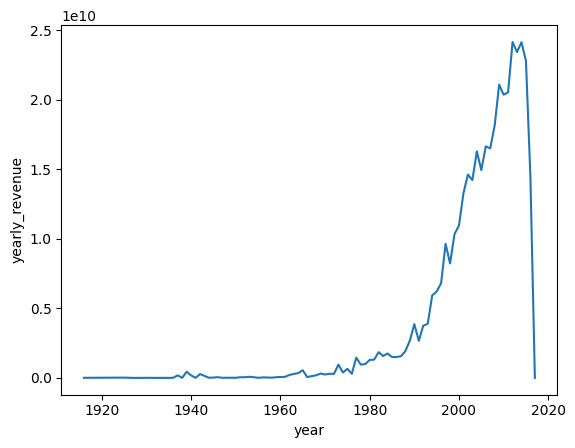

In [22]:
# profit from all movies for each year
yearly_revenue = df.groupby(['year'])['revenue'].sum().reset_index(name='yearly_revenue')
sns.lineplot(x=yearly_revenue.year, y=yearly_revenue.yearly_revenue)

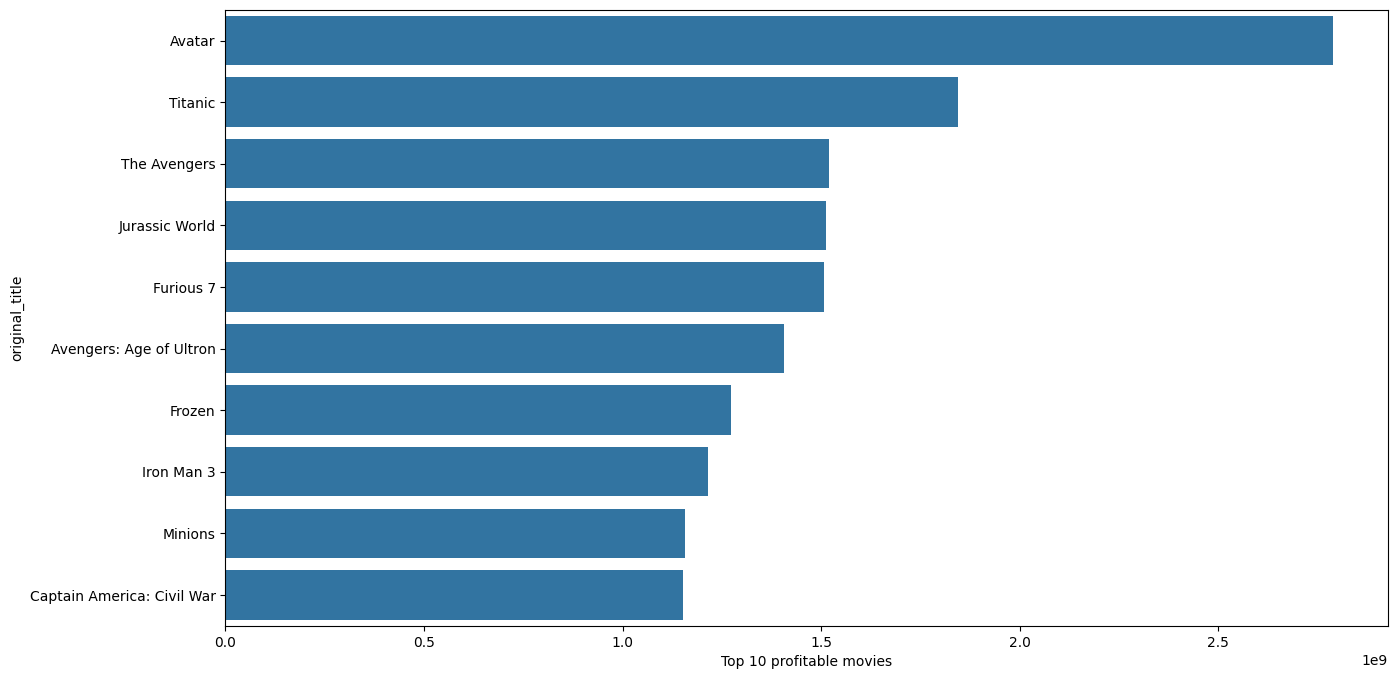

In [34]:
# top 10 profitable movies
plt.figure(figsize=(15,8))
sns.barplot(x = df.sort_values('revenue', ascending=False)[:10]['revenue'], y = df.sort_values('revenue', ascending=False)[:10]['original_title'], orient="h")
plt.xlabel("Top 10 profitable movies")
plt.show()